# The effects of the Covid 19 in Argentina using Apache Spark: Gini coefficient in 2020.

We download "https://infra.datos.gob.ar/catalog/sspm/dataset/65/distribution/65.1/download/indicadores-distribucion-ingreso-ocupacion-principal-e-ingreso-per-capita-familiar.csv", from "datos.gob.ar", using Pandas library. 
Then we create a dataframe with Pyspark and we filter it to exhibit the 2020 data, taking into account that the Gini coefficient is calculate in April, July and October.
Finally we show this data in the graph.

In [3]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np

pdDF = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/65/distribution/65.1/download/indicadores-distribucion-ingreso-ocupacion-principal-e-ingreso-per-capita-familiar.csv')

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

df = spark.createDataFrame(pdDF)
gini2020 = df.select('indice_tiempo','coeficiente_gini_ipcf').where(col('indice_tiempo').startswith('2020'))

gini2020.show()

+-------------+---------------------+
|indice_tiempo|coeficiente_gini_ipcf|
+-------------+---------------------+
|   2020-01-01|                0.444|
|   2020-04-01|                0.451|
|   2020-07-01|  0.44299999999999995|
+-------------+---------------------+



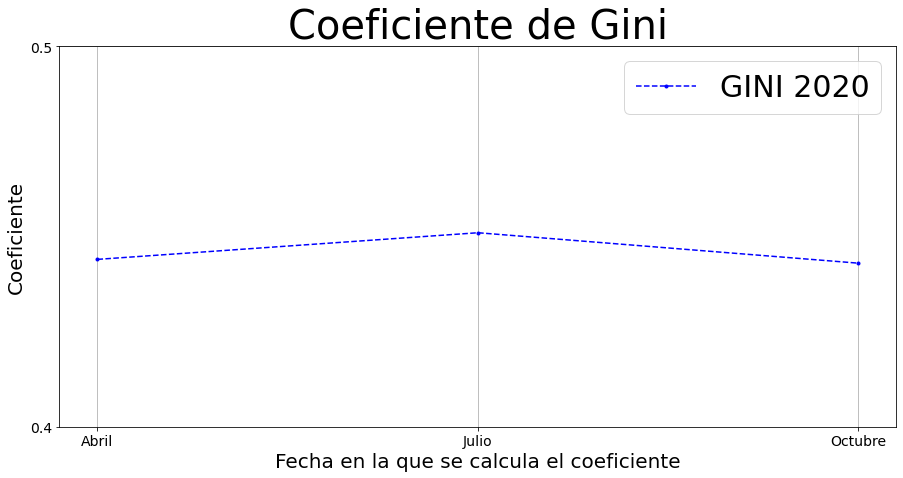

In [29]:
gini_2020 = list()
for line in gini2020.collect():
    line = float(line[1])
    gini_2020.append(line)

x = ['Abril', 'Julio', 'Octubre']
y = np.arange(0.4, 0.55, 0.1)

plt.plot(x, gini_2020, 'b.--', label= ('GINI 2020'))
plt.title('Coeficiente de Gini', fontdict= {'fontsize':40})
plt.xlabel('Fecha en la que se calcula el coeficiente', fontdict = {'fontsize':20})
plt.ylabel('Coeficiente', fontdict = {'fontsize':20})
plt.gcf().set_size_inches(15, 7)
plt.xticks(x, fontsize = 14)
plt.yticks(y, fontsize =14)
plt.legend(fontsize=30)
plt.grid()
plt.show()